In [1]:
import pandas as pd
df = pd.read_csv("prediksi_pengunjung_borobudur.csv")
df

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171
...,...,...,...,...,...,...
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hari_type          300 non-null    object 
 1   musim              300 non-null    object 
 2   suhu_rata_rata     300 non-null    float64
 3   ada_event_budaya   300 non-null    object 
 4   harga_tiket_ribu   300 non-null    float64
 5   jumlah_pengunjung  300 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [3]:
df.dtypes

hari_type             object
musim                 object
suhu_rata_rata       float64
ada_event_budaya      object
harga_tiket_ribu     float64
jumlah_pengunjung      int64
dtype: object

In [4]:
df.describe()

,suhu_rata_rata,harga_tiket_ribu,jumlah_pengunjung
count,300.000000,300.000000,300.000000
mean,27.067667,75.008000,24662.236667
std,4.248965,14.608945,7778.132529
min,20.100000,50.200000,10359.000000
25%,23.100000,61.875000,18732.000000
50%,26.800000,74.750000,23313.000000
75%,30.725000,86.725000,29500.750000
max,35.000000,100.000000,50000.000000


In [5]:
df.sample(6)

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
146,weekend,hujan,31.9,tidak,89.5,26189
212,weekday,hujan,27.6,tidak,63.7,20916
90,weekday,kemarau,20.3,tidak,66.9,18653
173,weekday,kemarau,24.8,tidak,88.8,20293
126,weekday,kemarau,24.0,tidak,98.4,20854
57,weekend,kemarau,27.6,tidak,78.4,25696


In [6]:
df.isna().sum()

hari_type            0
musim                0
suhu_rata_rata       0
ada_event_budaya     0
harga_tiket_ribu     0
jumlah_pengunjung    0
dtype: int64

In [8]:
df["hari_type"].value_counts()

hari_type
weekday    209
weekend     91
Name: count, dtype: int64

In [9]:
df["musim"].value_counts()

musim
kemarau    172
hujan      128
Name: count, dtype: int64

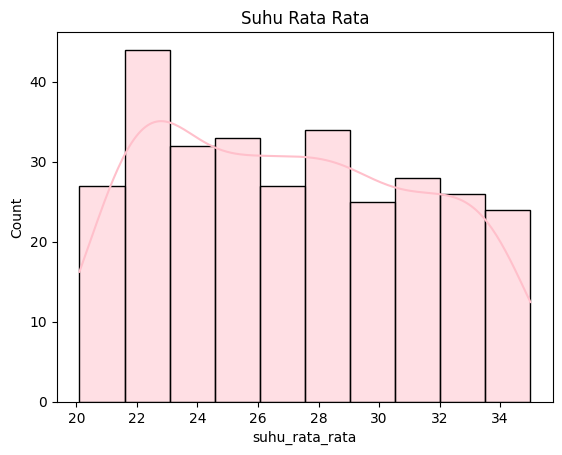

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["suhu_rata_rata"],kde=True,color="pink")
plt.title("Suhu Rata Rata")
plt.show()

                   suhu_rata_rata  harga_tiket_ribu  jumlah_pengunjung
suhu_rata_rata           1.000000         -0.087818           0.066873
harga_tiket_ribu        -0.087818          1.000000          -0.200427
jumlah_pengunjung        0.066873         -0.200427           1.000000


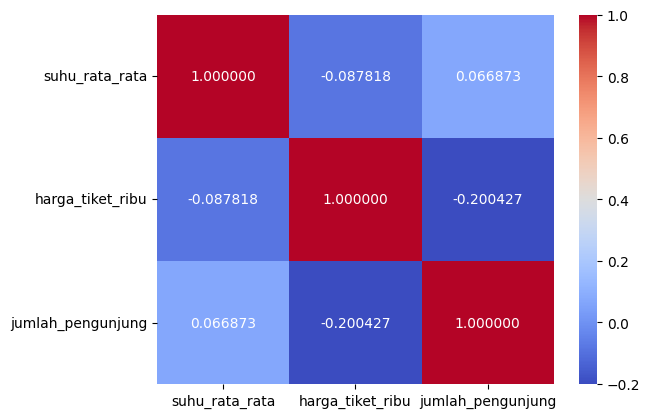

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_angka = df[["suhu_rata_rata","harga_tiket_ribu","jumlah_pengunjung"]]
corr = kolom_angka.corr()
print(corr)

sns.heatmap(corr,annot=True,fmt="2f",cmap="coolwarm")
plt.show()

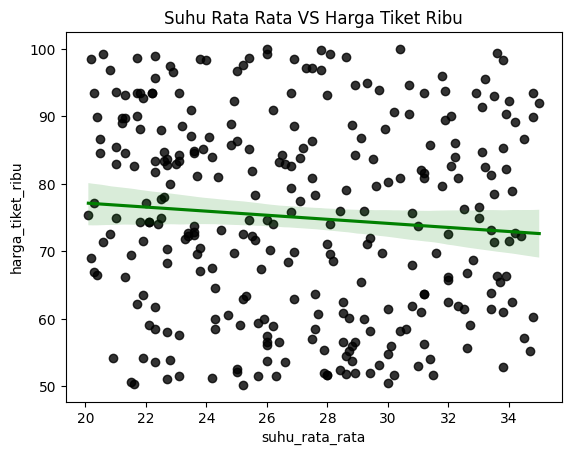

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=df["suhu_rata_rata"],y=df["harga_tiket_ribu"],scatter_kws={"color":"black"},line_kws={"color":"green"})
plt.title("Suhu Rata Rata VS Harga Tiket Ribu")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","harga_tiket_ribu","ada_event_budaya"]]
y = df["jumlah_pengunjung"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

numeric_columns=["suhu_rata_rata","harga_tiket_ribu"]
categorical_columns=["hari_type","musim","ada_event_budaya"]

preprocessing=ColumnTransformer(
    transformers=[
        ("scaler",StandardScaler(),numeric_columns),
        ("ohe",OneHotEncoder(),categorical_columns)
    ]
)

model_linear=Pipeline(
    steps=[
        ("preprocessing",preprocessing),
        ("model",LinearRegression())
    ]
)

model_linear.fit(X_train,y_train)
y_pred=model_linear.predict(X_test)
print("R2 Score :",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))

R2 Score : 0.7660968076281232
MAE : 2656.409625940078
MSE : 10542360.105586698


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","harga_tiket_ribu","ada_event_budaya"]]
y = df["jumlah_pengunjung"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

numeric_columns=["suhu_rata_rata","harga_tiket_ribu"]
categorical_columns=["hari_type","musim","ada_event_budaya"]

preprocessing=ColumnTransformer(
    transformers=[
        ("scaler",StandardScaler(),numeric_columns),
        ("ohe",OneHotEncoder(),categorical_columns)
    ]
)

model_forest=Pipeline(
    steps=[
        ("preprocessing",preprocessing),
        ("model",RandomForestRegressor(random_state=42,max_depth=5))
    ]
)

model_forest.fit(X_train,y_train)
y_pred=model_forest.predict(X_test)
print("R2 Score :",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))

R2 Score : 0.7785020400897842
MAE : 2518.361819162923
MSE : 9983238.075322058


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","harga_tiket_ribu","ada_event_budaya"]]
y = df["jumlah_pengunjung"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

numeric_columns=["suhu_rata_rata","harga_tiket_ribu"]
categorical_columns=["hari_type","musim","ada_event_budaya"]

preprocessing=ColumnTransformer(
    transformers=[
        ("scaler",StandardScaler(),numeric_columns),
        ("ohe",OneHotEncoder(),categorical_columns)
    ]
)

model_tree=Pipeline(
    steps=[
        ("preprocessing",preprocessing),
        ("model",DecisionTreeRegressor(random_state=42,max_depth=5))
    ]
)

model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)
print("R2 Score :",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))

R2 Score : 0.768624691435751
MAE : 2621.2335627798125
MSE : 10428424.673005152


In [30]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_forest,X_train,y_train,cv=5,scoring="r2")
print("Scores :",scores)
print("Mean Scores :",scores.mean())

Scores : [0.79614752 0.79710143 0.81597683 0.85493956 0.81045516]
Mean Scores : 0.8149240998661448


In [31]:
import joblib
joblib.dump(model_forest,"model_forest.joblib")

['model_forest.joblib']

In [50]:
import pandas as pd
import joblib

model_forest=joblib.load("model_forest.joblib")
data_baru=pd.DataFrame([["weekday","kemarau","32.3","80.5","tidak"]],
                       columns=["hari_type","musim","suhu_rata_rata","harga_tiket_ribu","ada_event_budaya"])
prediksi = model_forest.predict(data_baru)[0]
print(f"model memprediksi banyak pengunjung {prediksi : .0f}")

model memprediksi banyak pengunjung  25120


In [32]:
df.sample(1)

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
265,weekday,kemarau,31.4,tidak,85.8,20300
